In [64]:
import pandas as pd
import numpy as np
import re

import wordcloud
import matplotlib.pyplot as plt

In [4]:
l_2019 = pd.read_csv('lyrics_2019.csv')
l_2019['Lyrics'] = l_2019['Lyrics'].str.replace(',', '').str.replace('.', '').str.lower()

In [6]:
l_2019['words_splited'] = [re.findall(r"\w+", string) for string in l_2019['Lyrics']]

## FISH WORDS

In [17]:
def bunda(df_col):
    result = [re.findall(r'\bbund\w+', word) for word in df_col]
    return result

def rebolar(df_col):
    result = [re.findall(r'\brebol\w+', word) for word in df_col]
    return result

print(bunda(l_2019['Lyrics']))
print(rebolar(l_2019['Lyrics']))

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bundão', 'bundão'], [], [], [], [], [], [], ['bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda'], [], [], [], [], [], [], [], [], [], [], [], [], [], ['bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda']]
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['rebolo', 'rebolo', 'rebolo', 'rebolo', 'rebolo', 'rebolo', 'rebolo', 'rebola', 'rebolo', 'rebola', 'rebola'], [], ['rebolando', 'rebolando', 'rebolando'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


## create column

In [18]:
#I want to substitute words that vary from bunda
#bunda, bundão, bundinha
l_2019['list_bunda'] = bunda(l_2019['Lyrics'])
#rebolo, rebola, rebolando, rebolar
l_2019['list_rebolar'] = rebolar(l_2019['Lyrics'])

#others
l_2019['list_bumbum'] = [re.findall('bumbum', word) for word in l_2019['Lyrics']]
l_2019['list_cama'] = [re.findall('cama', word) for word in l_2019['Lyrics']]
l_2019['list_colchao'] = [re.findall('colchão', word) for word in l_2019['Lyrics']]

l_2019.head(50)

,Song,Singer,Lyrics,words_splited,list_bunda,list_bumbum,list_rebolar,list_cama,list_colchao,Total_words,count_bunda,count_rebolar,count_bumbum,count_colchão,count_cama
0,Tijolão,Jorge e Mateus,eu te conheci depois que a gente largou será o...,"[eu, te, conheci, depois, que, a, gente, largo...",[],[],[],[],[],477,0,0,0,0,0
1,Vou Ter Que Superar,Matheus e Kauan,fui bobo imaturo demais deixei escapar entre m...,"[fui, bobo, imaturo, demais, deixei, escapar, ...",[],[],[],[],[],695,0,0,0,0,0
2,Todo Mundo Vai Sofrer,Marília Mendonça,a garrafa precisa do copo o copo precisa da me...,"[a, garrafa, precisa, do, copo, o, copo, preci...",[],[],[],[],[],1082,0,0,0,0,0
3,Milu,Gusttavo Lima,quem cai uma vez vai cair três só que eu to ca...,"[quem, cai, uma, vez, vai, cair, três, só, que...",[],[],[],[],[],341,0,0,0,0,0
4,Supera,Marília Mendonça,tá de novo com essa pessoa não tô acreditando ...,"[tá, de, novo, com, essa, pessoa, não, tô, acr...",[],[],[],[],[],975,0,0,0,0,0
5,Cheirosa,Jorge e Mateus,se eu dissesse que tá tudo bem eu estaria ment...,"[se, eu, dissesse, que, tá, tudo, bem, eu, est...",[],[],[],[],[],509,0,0,0,0,0
6,Liberdade Provisória,Henrique e Juliano,no inicio foi assim terminou tá terminado cada...,"[no, inicio, foi, assim, terminou, tá, termina...",[],[],[],[],[],631,0,0,0,0,0
7,Some que ele vem atrás,Marília Mendonça,amiga do céu meu boy me largou parou de seguir...,"[amiga, do, céu, meu, boy, me, largou, parou, ...",[],[],[],[],[],1046,0,0,0,0,0
8,Bebi a Bicicleta,Zé Neto e Cristiano,cortaram minha luz perdi o meu emprego a minha...,"[cortaram, minha, luz, perdi, o, meu, emprego,...",[],[],[],[],[],432,0,0,0,0,0
9,Na Cama Que eu Paguei,Wesley Safadão,será que é pra tanto será que eu mereço não tá...,"[será, que, é, pra, tanto, será, que, eu, mere...",[],[],[],"[cama, cama]",[],551,0,0,0,0,2


In [77]:
#Total
l_2019['Total_words'] = l_2019['Lyrics'].str.len()
#Words of interest
l_2019['count_bunda'] = l_2019['Lyrics'].str.count(r'\bbund\w+')
l_2019['count_rebolar'] = l_2019['Lyrics'].str.count(r'\brebol\w+')
l_2019['count_bumbum'] = l_2019['Lyrics'].str.count('bumbum')
l_2019['count_colchão'] = l_2019['Lyrics'].str.count('colchão')
l_2019['count_cama'] = l_2019['Lyrics'].str.count('cama')

l_2019['Total_sexual_words']  = l_2019[['count_bunda','count_rebolar','count_bumbum','count_colchão','count_cama']].sum(axis = 1)
l_2019.head(50)



,Song,Singer,Lyrics,words_splited,list_bunda,list_bumbum,list_rebolar,list_cama,list_colchao,Total_words,count_bunda,count_rebolar,count_bumbum,count_colchão,count_cama,Total_sexual_words
0,Tijolão,Jorge e Mateus,eu te conheci depois que a gente largou será o...,"[eu, te, conheci, depois, que, a, gente, largo...",[],[],[],[],[],477,0,0,0,0,0,0
1,Vou Ter Que Superar,Matheus e Kauan,fui bobo imaturo demais deixei escapar entre m...,"[fui, bobo, imaturo, demais, deixei, escapar, ...",[],[],[],[],[],695,0,0,0,0,0,0
2,Todo Mundo Vai Sofrer,Marília Mendonça,a garrafa precisa do copo o copo precisa da me...,"[a, garrafa, precisa, do, copo, o, copo, preci...",[],[],[],[],[],1082,0,0,0,0,0,0
3,Milu,Gusttavo Lima,quem cai uma vez vai cair três só que eu to ca...,"[quem, cai, uma, vez, vai, cair, três, só, que...",[],[],[],[],[],341,0,0,0,0,0,0
4,Supera,Marília Mendonça,tá de novo com essa pessoa não tô acreditando ...,"[tá, de, novo, com, essa, pessoa, não, tô, acr...",[],[],[],[],[],975,0,0,0,0,0,0
5,Cheirosa,Jorge e Mateus,se eu dissesse que tá tudo bem eu estaria ment...,"[se, eu, dissesse, que, tá, tudo, bem, eu, est...",[],[],[],[],[],509,0,0,0,0,0,0
6,Liberdade Provisória,Henrique e Juliano,no inicio foi assim terminou tá terminado cada...,"[no, inicio, foi, assim, terminou, tá, termina...",[],[],[],[],[],631,0,0,0,0,0,0
7,Some que ele vem atrás,Marília Mendonça,amiga do céu meu boy me largou parou de seguir...,"[amiga, do, céu, meu, boy, me, largou, parou, ...",[],[],[],[],[],1046,0,0,0,0,0,0
8,Bebi a Bicicleta,Zé Neto e Cristiano,cortaram minha luz perdi o meu emprego a minha...,"[cortaram, minha, luz, perdi, o, meu, emprego,...",[],[],[],[],[],432,0,0,0,0,0,0
9,Na Cama Que eu Paguei,Wesley Safadão,será que é pra tanto será que eu mereço não tá...,"[será, que, é, pra, tanto, será, que, eu, mere...",[],[],[],"[cama, cama]",[],551,0,0,0,0,2,2


In [59]:
l_2019.to_csv('count_2019.csv',index=False)

## Check ratio

In [25]:
total_sexual_words = l_2019['Total_sexual_words'].sum(axis = 0)
print(total_sexual_words)
total_words = l_2019['Total_words'].sum(axis = 0)
print(total_words)

45
37850


In [74]:
stop = 'ta tá cê ai vai ver volto tô vou pra quero quanto mim deu assim de \na \no \nque \ne \ndo \nda \nem \num \npara \né \ncom \nnão \numa \nos \nno \nse \nna \npor \nmais \nas \ndos \ncomo \nmas \nfoi \nao \nele \ndas \ntem \nà \nseu \nsua \nou \nser \nquando \nmuito \nhá \nnos \njá \nestá \neu \ntambém \nsó \npelo \npela \naté \nisso \nela \nentre \nera \ndepois \nsem \nmesmo \naos \nter \nseus \nquem \nnas \nme \nesse \neles \nestão \nvocê \ntinha \nforam \nessa \nnum \nnem \nsuas \nmeu \nàs \nminha \ntêm \nnuma \npelos \nelas \nhavia \nseja \nqual \nserá \nnós \ntenho \nlhe \ndeles \nessas \nesses \npelas \neste \nfosse \ndele \ntu \nte \nvocês \nvos \nlhes \nmeus \nminhas\nteu \ntua\nteus\ntuas\nnosso \nnossa\nnossos\nnossas\ndela \ndelas \nesta \nestes \nestas \naquele \naquela \naqueles \naquelas \nisto \naquilo \nestou\nestá\nestamos\nestão\nestive\nesteve\nestivemos\nestiveram\nestava\nestávamos\nestavam\nestivera\nestivéramos\nesteja\nestejamos\nestejam\nestivesse\nestivéssemos\nestivessem\nestiver\nestivermos\nestiverem\nhei\nhá\nhavemos\nhão\nhouve\nhouvemos\nhouveram\nhouvera\nhouvéramos\nhaja\nhajamos\nhajam\nhouvesse\nhouvéssemos\nhouvessem\nhouver\nhouvermos\nhouverem\nhouverei\nhouverá\nhouveremos\nhouverão\nhouveria\nhouveríamos\nhouveriam\nsou\nsomos\nsão\nera\néramos\neram\nfui\nfoi\nfomos\nforam\nfora\nfôramos\nseja\nsejamos\nsejam\nfosse\nfôssemos\nfossem\nfor\nformos\nforem\nserei\nserá\nseremos\nserão\nseria\nseríamos\nseriam\ntenho\ntem\ntemos\ntém\ntinha\ntínhamos\ntinham\ntive\nteve\ntivemos\ntiveram\ntivera\ntivéramos\ntenha\ntenhamos\ntenham\ntivesse\ntivéssemos\ntivessem\ntiver\ntivermos\ntiverem\nterei\nterá\nteremos\nterão\nteria\nteríamos\nteriam'
stop = stop.replace('\n',' ').strip()
stoplist = re.sub("[^\w]", " ",  stop).split()
stoplist

filtered_words = [word for lst in l_2019['words_splited'] for word in lst if word not in stoplist]
#clean_lyrics = ' '.join(filtered_words)
print (len(filtered_words))

ratio_2019 = total_sexual_words / len(filtered_words)
ratio_2019

3838


0.011724856696195935

In [57]:
l_2019[['count_bunda','count_rebolar','count_bumbum','count_colchão','count_cama']].sum(axis = 0)

count_bunda      18
count_rebolar    14
count_bumbum      4
count_colchão     0
count_cama        9
dtype: int64

In [75]:
#print(filtered_words)
bag_all = " ".join(filtered_words)
bag_all

'conheci gente largou onde arrumou todo ódio agora to aqui bar currutela abrindo cerveja dente tentando passar frente dera porque bloqueou parar chorar cima tela trocar celular nokia tijolão manda mensagem faz ligação vídeo sendo feliz certeza vida triz mata internet virou arma mão bobo imaturo demais deixei escapar dedos amor apartamento futuro perfeito pudesse tentava novo aqui quase morro tentando encontrar contato novo agora sei outra embora existe consideração sei ouvir pedir desculpas sempre acabou novo amor veio tudo erro pesou balança vamos ficar juntos estraguei tudo superar fotos viajando amigas comentando belo casal superar dia casamento esperando tempo poucos possa curar superar gente voltar garrafa precisa copo copo precisa mesa mesa precisa preciso cerveja igual preciso vida atrás pisa então sofro pausa quiser amar sofrer nessa bagaça quer quer querer ninguém sofrer sozinho todo mundo sofrer quer quer querer ninguém sofrer sozinho todo mundo sofrer igual preciso vida atrá

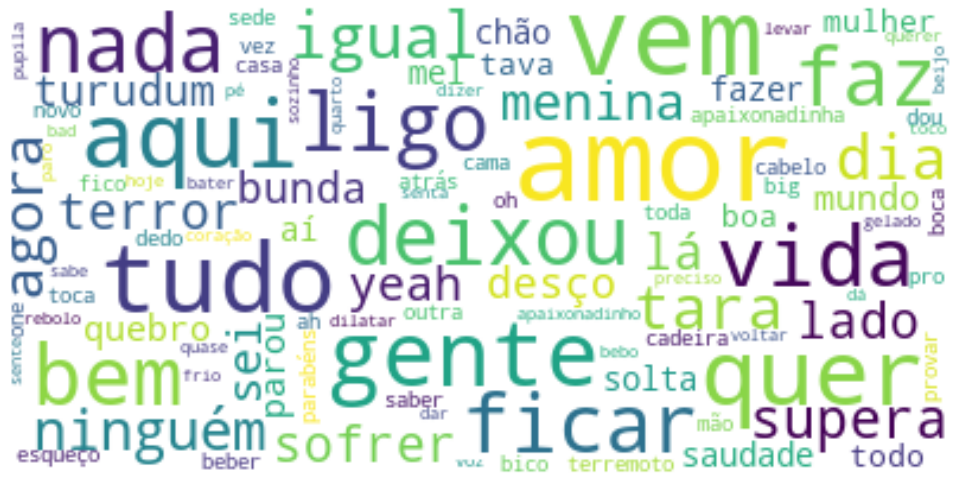

In [76]:
import wordcloud

wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(bag_all)
plt.figure(figsize=[17,17])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
#plt.show()

#plt.savefig("words_19.png", dpi = 400)

## draft

In [35]:
sexual_cloud = []
for lst in l_2019['list_bunda']:
    if len(lst) > 0:
        sexual_cloud.append(lst)
        
sexual_cloud

[['bundão', 'bundão'],
 ['bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda'],
 ['bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda', 'bunda']]

In [51]:
sexual_columns = ['list_bunda','list_bumbum','list_rebolar','list_cama', 'list_colchao']
sexual_cloud = []
for name in sexual_columns:
    for lst in  l_2019[name]:
        if len(lst) > 0:
            sexual_cloud.append(lst)
        
sexual_cloud = [i for lst in sexual_cloud for i in lst ]
bag_sexual = " ".join(sexual_cloud)
bag_sexual

'bundão bundão bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bunda bumbum bumbum bumbum bumbum rebolo rebolo rebolo rebolo rebolo rebolo rebolo rebola rebolo rebola rebola rebolando rebolando rebolando cama cama cama cama cama cama cama cama cama'